Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
Xd=poly.fit_transform(X)
Xd

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
# Vaš kôd ovdje
w1=np.dot(np.dot(linalg.matrix_power(np.dot(Xd.T,Xd),-1),Xd.T),y)
w2=np.dot(linalg.pinv(Xd),y)
print(w1)
print(w2)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

4.085714285714286


2.042857142857143

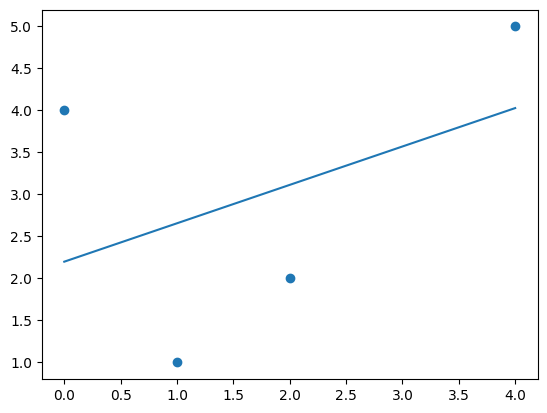

In [5]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje

hx = lambda a : np.dot(a,w1.T)
plt.scatter(X, y)
plt.plot(X,hx(Xd))
def e(a,b):
    rez=a-b
    rez=pow(rez,2)
    return 0.5*np.sum(rez)
print(e(hx(Xd),y))
mean_squared_error(y,hx(Xd))


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
# Vaš kôd ovdje
#w3=np.dot(linalg.matrix_power(Xd,-1),y)
#To je slučaj zato što matrica Xd nije kvadratna i zato se nemoze naći njezin inverz.Problem bi se mogao rješiti preslikavanjem u višu dimenziju da imamo matricu
# 4x4. To nebi uvijek funkcioniralo jer ako imamo više od 4 primjera morali bi u više dimenzija preslikavati.
poly = PolynomialFeatures(3)
xd2=poly.fit_transform(X)
w3=np.dot(linalg.matrix_power(xd2,-1),y)
print(w3)


[ 4.         -5.91666667  3.375      -0.45833333]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)

mean_squared_error(y,reg.predict(X))

[0.45714286]
2.2


2.042857142857143

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    y=f(X)
    for i in range(0,len(y)):
        y[i][0]+=normal(0,noise)
    return y

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
# Vaš kôd ovdje
funkcija=lambda z:5+z-2*pow(z,2)-5*pow(z,3)
instances=make_instances(-5,5,50)
labels=make_labels(instances,funkcija,200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

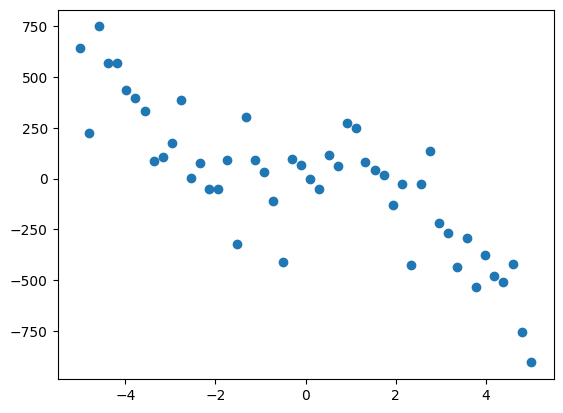

In [11]:
# Vaš kôd ovdje
plt.scatter(instances,labels)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

25905.76569924775

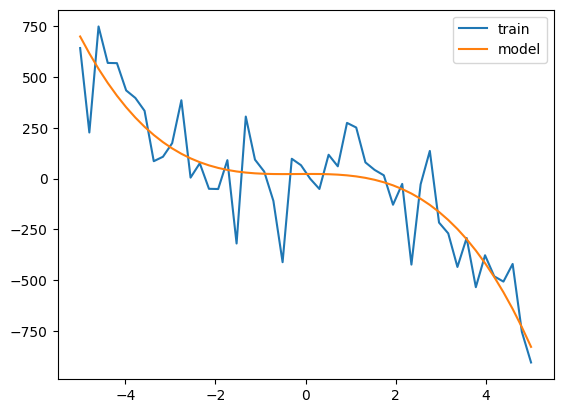

In [12]:
# Vaš kôd ovdje
poly = PolynomialFeatures(3)
instancesPoly=poly.fit_transform(instances)
wpoly=np.dot(linalg.pinv(instancesPoly),labels)
hx2 = lambda a : np.dot(a,wpoly)
plt.plot(instances,labels,label="train")
plt.plot(instances,hx2(instancesPoly),label="model")
plt.legend(loc="best")
mean_squared_error(labels,hx2(instancesPoly))

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

pogreška modela 1
41799.99680540986
pogreška modela 3
25905.76569924775
pogreška modela 5
24011.63718780763
pogreška modela 10
21867.40352612789
pogreška modela 20
13250.210468025256


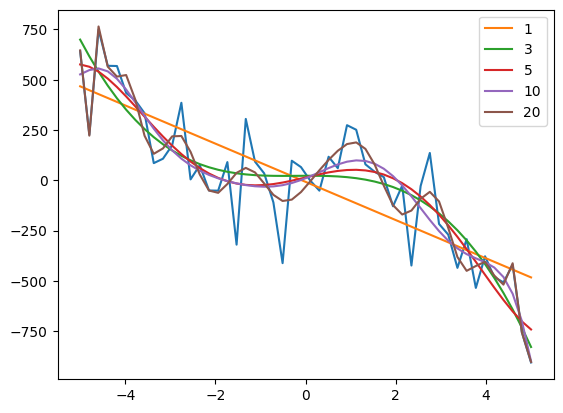

In [13]:
# Vaš kôd ovdje
plt.plot(instances,labels)
for j in [1,3,5,10,20]:
    poly = PolynomialFeatures(j)
    instancesPoly=poly.fit_transform(instances)
    wl=np.dot(linalg.pinv(instancesPoly), labels)
    hx2 = lambda a : np.dot(a, wl)
    plt.plot(instances,hx2(instancesPoly),label=str(j))
    print("pogreška modela "+str(j))
    print(mean_squared_error(labels,hx2(instancesPoly)))
plt.legend(loc="best")

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

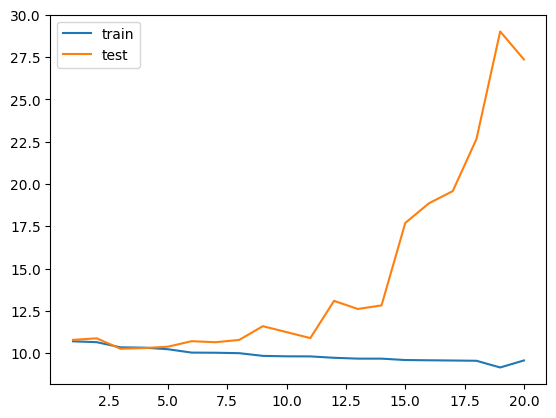

In [14]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.5, train_size=0.5)
ab=range(1,21)
bc=[]
cd=[]
for j in range(1,21):
    poly = PolynomialFeatures(j)
    instancesPolyTrain=poly.fit_transform(X_train)
    instancesPolyTest=poly.fit_transform(X_test)
    wl=np.dot(linalg.pinv(instancesPolyTrain), y_train)
    hx2 = lambda a : np.dot(a, wl)
    bc.append(np.log(mean_squared_error(y_train,hx2(instancesPolyTrain))))
    cd.append(np.log(mean_squared_error(y_test,hx2(instancesPolyTest))))
    #plt.scatter(j,np.log(mean_squared_error(y_train,hx2(X_train))),label=str(j))
    #plt.scatter(j,np.log(mean_squared_error(y_test,hx2(X_test))),label=str(j))
plt.plot(ab,bc,label="train")
plt.plot(ab,cd,label="test")
plt.legend(loc="best")


 ### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

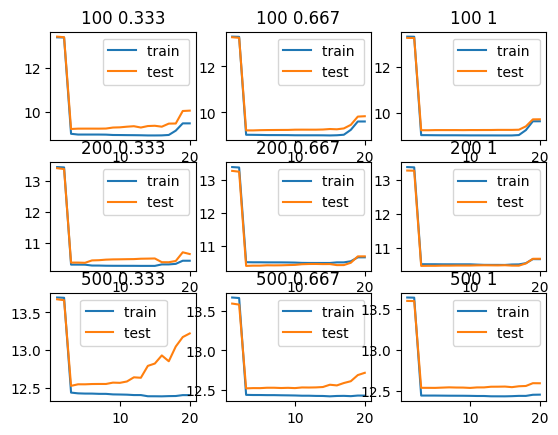

In [15]:
# Vaš kôd ovdje
primjeri=make_instances(-10,10,1000)
primjeri_train, primjeri_test= train_test_split(primjeri, test_size=0.5, train_size=0.5,shuffle=True)
primjeri_test1=make_labels(primjeri_test,funkcija,100)
primjeri_test2=make_labels(primjeri_test,funkcija,200)
primjeri_test3=make_labels(primjeri_test,funkcija,500)
primjeri_train1=make_labels(primjeri_train,funkcija,100)
primjeri_train2=make_labels(primjeri_train,funkcija,200)
primjeri_train3=make_labels(primjeri_train,funkcija,500)
def ispis(xtrain,xtest,ytrain,ytest,level,N,div):
    ab=range(1,21)
    bc=[]
    cd=[]
    for j in range(1,21):
      poly = PolynomialFeatures(j)
      instancesPolyTrain=poly.fit_transform(xtrain)
      instancesPolyTest=poly.fit_transform(xtest)
      wl=np.dot(linalg.pinv(instancesPolyTrain), ytrain)
      hx2 = lambda a : np.dot( a,wl)
      bc.append(np.log(mean_squared_error(ytrain,hx2(instancesPolyTrain))))
      cd.append(np.log(mean_squared_error(ytest,hx2(instancesPolyTest))))
    plt.subplot(3,3,level)
    str1="train "
    str2="test "
    plt.plot(ab,bc,label=str1)
    plt.plot(ab,cd,label=str2)
    plt.title(str(N)+" "+str(div))
    plt.legend(loc="best")
g=[0.333,0.667,1]
for i in range(1,4):
    ispis(primjeri_train[:int(g[i-1]*500)], primjeri_test[:int(g[i-1]*500)],primjeri_train1[:int(g[i-1]*500)], primjeri_test1[:int(g[i-1]*500)],i,100,g[i-1])
    ispis(primjeri_train[:int(g[i-1]*500)], primjeri_test[:int(g[i-1]*500)],primjeri_train2[:int(g[i-1]*500)], primjeri_test2[:int(g[i-1]*500)],i+3,200,g[i-1])
    ispis(primjeri_train[:int(g[i-1]*500)], primjeri_test[:int(g[i-1]*500)],primjeri_train3[:int(g[i-1]*500)], primjeri_test3[:int(g[i-1]*500)],i+6,500,g[i-1])
    

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
# Vaš kôd ovdje
poly = PolynomialFeatures(3)
Xr=poly.fit_transform(X)
print(Xr)
jedinicna=np.eye(4)

wr1=np.dot(np.dot(linalg.matrix_power(np.dot(Xr.T,Xr)+np.array(0*jedinicna),-1),Xr.T),y)
wr2=np.dot(np.dot(linalg.matrix_power(np.dot(Xr.T,Xr)+np.array(1*jedinicna),-1),Xr.T),y)
wr3=np.dot(np.dot(linalg.matrix_power(np.dot(Xr.T,Xr)+np.array(10*jedinicna),-1),Xr.T),y)
print(wr1)
print(wr2)
print(wr3)
#matrica koju treba invertirati je kvadratna 4x4
#težine se razlikuju po tome što je veći stupanj regularizacije to su težine sličnije, to je očekivano jer što je regularizacija ograničava paramtere da koji postaju veći.

[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
clf = Ridge(alpha=0)
clf.fit(Xr, y)
print(clf.coef_)
print(clf.intercept_)
clf = Ridge(alpha=1.0)
clf.fit(Xr, y)
print(clf.coef_)
print(clf.intercept_)
clf = Ridge(alpha=10.0)
clf.fit(Xr, y)
print(clf.coef_)
print(clf.intercept_)
#Tezine nisu iste kao u zadatku 4a, 

[ 0.         -5.91666667  3.375      -0.45833333]
4.00000000000002
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
3.0569614512471652
[ 0.         -0.15897295 -0.13423067  0.0815601 ]
2.494441843122973


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

0 2
100 10
100 2
0 10


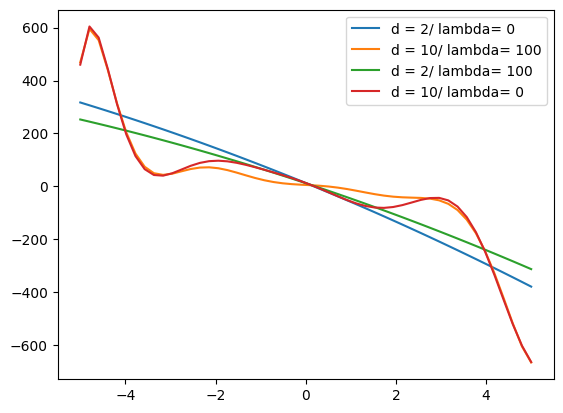

In [18]:
# Vaš kôd ovdje
regInstances=make_instances(-5,5,50)
regLabels=make_labels(instances,funkcija,200)
for l, d in zip([0,100,100,0], [2,10,2,10]):
    print(l, d)
    poly = PolynomialFeatures(d)
    xr=poly.fit_transform(regInstances)
    clf = Ridge(alpha=l)
    clf.fit(xr, regLabels)
    str1="d = "+str(d)+"/ lambda= "+str(l)
    plt.plot(regInstances,clf.predict(xr),label=str1)
  
    
plt.legend(loc="best")

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


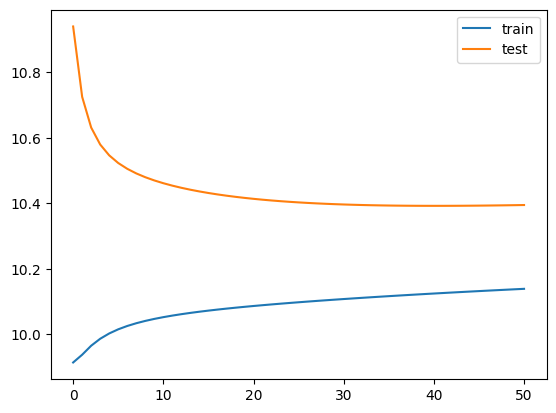

In [19]:
# Vaš kôd ovdje
X_trainR, X_testR, y_trainR, y_testR = train_test_split(regInstances,regLabels, test_size=0.5, train_size=0.5)
ab=range(0,51)
bc=[]
cd=[]
poly = PolynomialFeatures(10)
for j in range(0,51):
    
    xrtrain=poly.fit_transform(X_trainR)
    xrtest=poly.fit_transform(X_testR)
    clf = Ridge(alpha=j)
    clf.fit(xrtrain, y_trainR)
    bc.append(np.log(mean_squared_error(y_trainR,clf.predict(xrtrain))))
    cd.append(np.log(mean_squared_error(y_testR,clf.predict(xrtest))))
plt.plot(ab,bc,label="train")
plt.plot(ab,cd,label="test")
plt.legend(loc="best")


### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

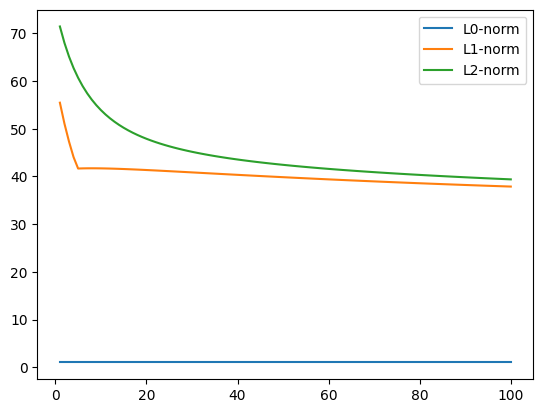

In [21]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
#X_train, X_test, y_train, y_test
ab=range(1,101)
bc=[]
cd=[]
de=[]
poly = PolynomialFeatures(5)
for j in range(1,101):
    
    xrtrain=poly.fit_transform(X_train)
    xrtest=poly.fit_transform(X_test)
    clf = Ridge(alpha=j)
    
    clf.fit(xrtrain, y_train)
    
    data=clf.coef_
    data[0][0]=clf.intercept_[0]
    
    bc.append(nonzeroes(data))
    cd.append(linalg.norm(data,1))
    de.append(linalg.norm(data,2))
plt.plot(ab,bc,label="L0-norm")
plt.plot(ab,cd,label="L1-norm")
plt.plot(ab,de,label="L2-norm")
plt.legend(loc="best")

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

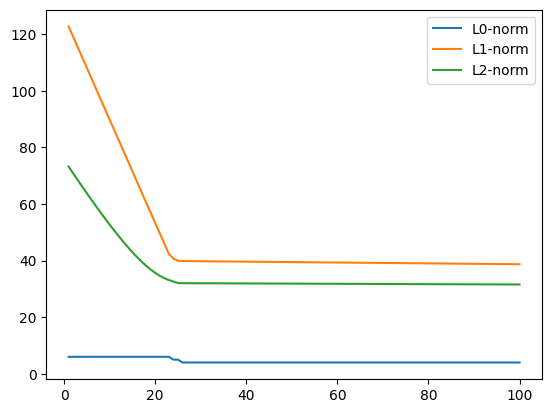

In [22]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje
ab=range(1,101)
bc=[]
cd=[]
de=[]
poly = PolynomialFeatures(5)
for j in range(1,101):
    
    xrtrain=poly.fit_transform(X_train)
    xrtest=poly.fit_transform(X_test)
    clf = Lasso(alpha=j)
    
    clf.fit(xrtrain, y_train)
    
    data=clf.coef_
    data[0]=clf.intercept_[0]
    
    bc.append(nonzeroes(data))
    cd.append(linalg.norm(data,1))
    de.append(linalg.norm(data,2))
plt.plot(ab,bc,label="L0-norm")
plt.plot(ab,cd,label="L1-norm")
plt.plot(ab,de,label="L2-norm")
plt.legend(loc="best")

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [23]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

Text(0.5, 1.0, 'grade in highscool / grades')

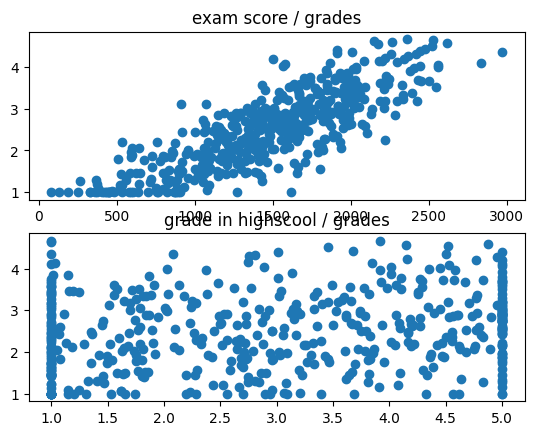

In [24]:
# Vaš kôd ovdje
plt.subplot(2,1,1)
plt.scatter(exam_score,grades_y)
plt.title("exam score / grades")
plt.subplot(2,1,2)
plt.scatter(grade_in_highschool,grades_y)
plt.title("grade in highscool / grades")

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [25]:
# Vaš kôd ovdje
clf=Ridge(alpha=0.01)
clf.fit(grades_X,grades_y)
print(clf.coef_)
print(clf.intercept_)


[0.00141497 0.09477276]
0.15061179575775974


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Text(0.5, 1.0, 'grade in highscool / grades')

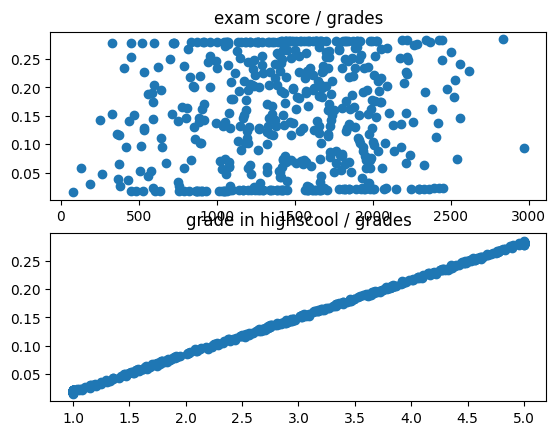

In [26]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
scaler = StandardScaler()
grades_X_fixed=scaler.fit_transform(grades_X)
grades_y_fixed=clf.predict(grades_X_fixed)
plt.subplot(2,1,1)
plt.scatter(exam_score,grades_y_fixed)
plt.title("exam score / grades")
plt.subplot(2,1,2)
plt.scatter(grade_in_highschool,grades_y_fixed)
plt.title("grade in highscool / grades")

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [27]:
# Vaš kôd ovdje

grades_X_fixed_colinear=np.append(grades_X_fixed,grades_X_fixed[:,[-1]],axis=1)
grades_X_fixed_colinear
    

array([[ 0.95063817, -0.78607869, -0.78607869],
       [-0.50343434, -0.50193004, -0.50193004],
       [ 1.18596832, -0.52213172, -0.52213172],
       ...,
       [-0.31593552,  0.80074234,  0.80074234],
       [ 0.81288393,  1.24783236,  1.24783236],
       [-0.01938126,  1.21729714,  1.21729714]])

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [28]:
# Vaš kôd ovdje
clf=Ridge(alpha=0.01)
clf.fit(grades_X_fixed_colinear,grades_y_fixed)
print(clf.coef_)
print(clf.intercept_)

[0.00141501 0.0473859  0.0473859 ]
0.15061179575775974


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [29]:
# Vaš kôd ovdje
n1=[]
n2=[]
n3=[]
n4=[]
n5=[]
n6=[]
for i in range(0,10):
    X_trainR, X_testR = train_test_split(grades_X_fixed_colinear, test_size=0.5, train_size=0.5,shuffle=True)
    clf=Ridge(alpha=0.01)
    clf.fit(X_trainR,X_testR )
    F=clf.coef_
    n1.append(F[0])
    n2.append(F[1])
    n3.append(F[2])
    clf=Ridge(alpha=1000)
    clf.fit(X_trainR,X_testR)
    F=clf.coef_
    n4.append(F[0])
    n5.append(F[1])
    n6.append(F[2])
print(np.std(n1))
print(np.std(n2))
print(np.std(n3))
print(np.std(n4))
print(np.std(n5))
print(np.std(n6))


0.04729097763775658
0.05349190455295303
0.05349190455295303
0.010772424867453735
0.013100780335248544
0.013100780335248544


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.